## MATH 151 Lab 8

Section Number: 568


Members:


- Brighton Sikarskie
- Colton Hesser
- Gabriel Gonzalez
- Gabriel Cuevas

In [119]:
from sympy import *
from sympy.plotting import (plot,plot_parametric)
%matplotlib inline

### Question 1

#### 1a

The derivative of f(x) = 0.025*x**6 + 0.05*x**5 - 0.4*x**4 - 0.5*x**3 + 1.6*x**2 - 0.9*x + 1.8 is 0.15*x**5 + 0.25*x**4 - 1.6*x**3 - 1.5*x**2 + 3.2*x - 0.9
The critical values of f(x) are x = [-3.34365086397455, -2.20571930723638, 0.367785714582751, 0.821156998770767, 2.69376079119075]
The surrounding values of the critical values values are [(-oo, -3.34365086397455), (-3.34365086397455, -2.20571930723638), (-2.20571930723638, 0.367785714582751), (0.367785714582751, 0.821156998770767), (0.821156998770767, 2.69376079119075), (2.69376079119075, oo)]
The increasing intervals are [(-3.34365086397455, -2.20571930723638), (0.367785714582751, 0.821156998770767), (2.69376079119075, oo)]
The decreasing intervals are [(-oo, -3.34365086397455), (-2.20571930723638, 0.367785714582751), (0.821156998770767, 2.69376079119075)]


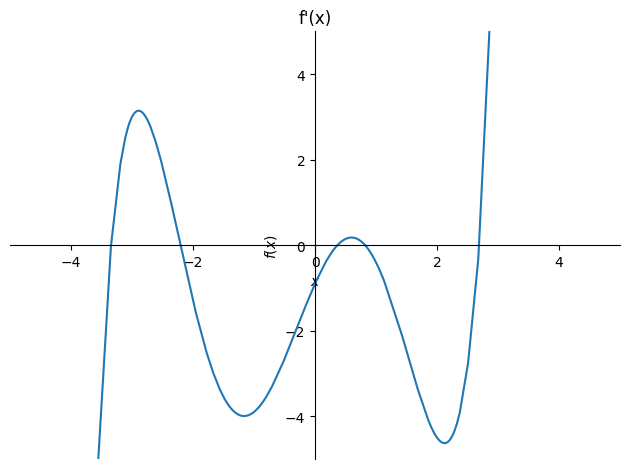

The graph of f'(x) = 0.15*x**5 + 0.25*x**4 - 1.6*x**3 - 1.5*x**2 + 3.2*x - 0.9 is shown above.


In [120]:
# given f(x) = 1/40 * (x^6 + 2x^5 - 16x^4 - 20x^3 + 64x^2 - 36x + 72)
# find f'(x) and the approximate critical values of (real values only)
x = Symbol('x')
f = 1 / 40 * (x ** 6 + 2 * x ** 5 - 16 * x ** 4 - 20 * x ** 3 + 64 * x ** 2 - 36 * x + 72)
fprime = f.diff(x)
critical_values = solve(fprime)

print(f'The derivative of f(x) = {f} is {fprime}')
print(f'The critical values of f(x) are x = {critical_values}')

def change_in_function(f, fprime, critical_values, msg):
    surrounding_values = []
    for i, v in enumerate(critical_values):
        # if the critical value is the first value then the left side of the interval is -oo or oo
        if i == 0:
            left = -oo
            right = v
        # elif the critical value is the last value then the right side of the interval is oo or -oo
        elif i == len(critical_values) - 1:
            # if the critical value is the last value then we must append 1 more value to the list of surrounding values
            surrounding_values.append((critical_values[i - 1], v))
            right = oo
            left = v
        # else the left side of the interval is the previous critical value and the right side is the next critical value
        else:
            left = critical_values[i - 1] 
            right = critical_values[i]
        # append the interval to the surrounding_values list
        surrounding_values.append((left, right))
    print(f'The surrounding values of the {msg} values are {surrounding_values}')

    # find the increasing and decreasing intervals
    increasing_intervals = []
    decreasing_intervals = []
    for i, (l, r) in enumerate(surrounding_values):
        if i == len(surrounding_values) - 1:
            val = l + 1
        elif i == 0:
            val = r - 1
        else:
            val = abs(r - l) / 2 + l
        if fprime.subs(x, val) > 0:
            increasing_intervals.append((l, r))
        else:
            decreasing_intervals.append((l, r))
    return increasing_intervals, decreasing_intervals

increasing_intervals, decreasing_intervals = change_in_function(f, fprime, critical_values, "critical values")
print(f'The increasing intervals are {increasing_intervals}')
print(f'The decreasing intervals are {decreasing_intervals}')
    
# plot f'(x)
plot(fprime, xlim=(-5, 5), ylim=(-5, 5), title="f'(x)")
print(f"The graph of f'(x) = {fprime} is shown above.")

#### 1b

The second derivative of f(x) = 0.025*x**6 + 0.05*x**5 - 0.4*x**4 - 0.5*x**3 + 1.6*x**2 - 0.9*x + 1.8 which is the derivative of f'(x) is 0.75*x**4 + 1.0*x**3 - 4.8*x**2 - 3.0*x + 3.2
The inflection values of f(x) are x = [-2.89174218338126 + 1.78636936811663e-30*I, -1.16242859299527 - 5.51234993515341e-30*I, 0.597894461879547 + 6.00114534019814e-30*I, 2.12294298116364 - 2.27516477316136e-30*I]
The real inflection points of f(x) are x = [-2.89174218338126, -1.16242859299527, 0.597894461879547, 2.12294298116364]
The surrounding values of the inflection points values are [(-oo, -2.89174218338126), (-2.89174218338126, -1.16242859299527), (-1.16242859299527, 0.597894461879547), (0.597894461879547, 2.12294298116364), (2.12294298116364, oo)]
The concave up intervals are [(-oo, -2.89174218338126), (-1.16242859299527, 0.597894461879547), (2.12294298116364, oo)]
The concave down intervals are [(-2.89174218338126, -1.16242859299527), (0.597894461879547, 2.12294298116364)]


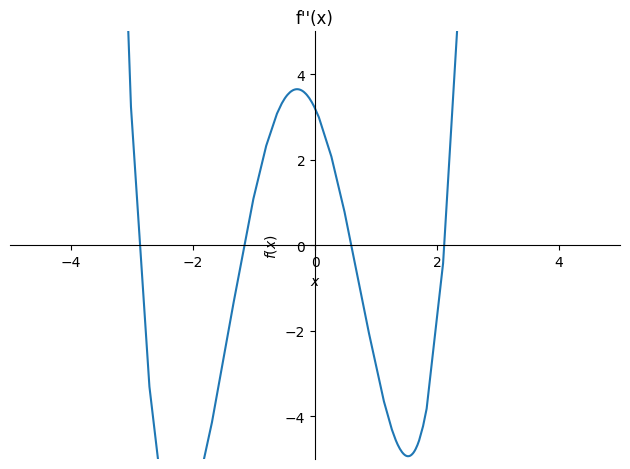

The graph of f''(x) = 0.75*x**4 + 1.0*x**3 - 4.8*x**2 - 3.0*x + 3.2 is shown above.


In [121]:
# find f''(x) and the possible inflection values of f (real values only)
# use the values around the inflection values to find where f is concave up and concave down
fprimeprime = fprime.diff(x)
inflection_points = solve(fprimeprime)
print(f"The second derivative of f(x) = {f} which is the derivative of f'(x) is {fprimeprime}")
print(f'The inflection values of f(x) are x = {inflection_points}')
# keep only the real values
inflection_points = [float(str(v).split()[0]) for v in inflection_points]
print(f'The real inflection points of f(x) are x = {inflection_points}')

concave_up, concave_down = change_in_function(fprime, fprimeprime, inflection_points, "inflection points")
print(f'The concave up intervals are {concave_up}')
print(f'The concave down intervals are {concave_down}')

# plot f''(x)
plot(fprimeprime, xlim=(-5, 5), ylim=(-5, 5), title="f''(x)")
print(f"The graph of f''(x) = {fprimeprime} is shown above.")


#### 1c

In [122]:
# find the local maxima and minima of f(x)
# if the second derivative is positive then the local min is at the critical value
# if the second derivative is negative then the local max is at the critical value
local_maxima = []
local_minima = []
for i, v in enumerate(critical_values):
    if fprimeprime.subs(x, v) > 0:
        local_minima.append(v)
    else:
        local_maxima.append(v)
print(f'The local maxima of f(x) are x = {local_maxima}')
print(f'The local minima of f(x) are x = {local_minima}')
print(f'There are {len(local_maxima)} local maxima and {len(local_minima)} local minima making a total of {len(local_minima) + len(local_maxima)} local maxima and minima.')

The local maxima of f(x) are x = [-2.20571930723638, 0.821156998770767]
The local minima of f(x) are x = [-3.34365086397455, 0.367785714582751, 2.69376079119075]
There are 2 local maxima and 3 local minima making a total of 5 local maxima and minima.


#### 1d

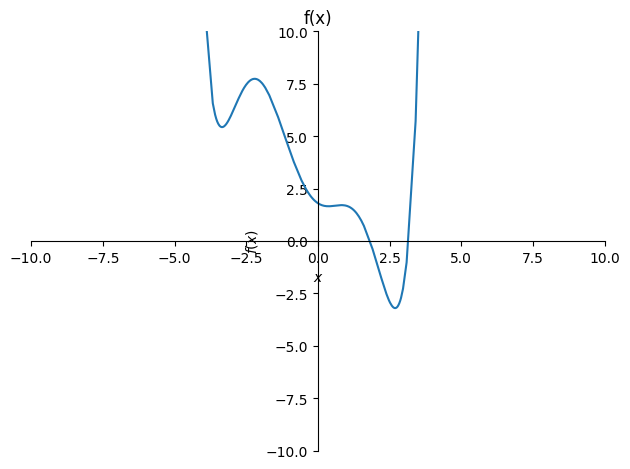

The graph of f(x) = 0.025*x**6 + 0.05*x**5 - 0.4*x**4 - 0.5*x**3 + 1.6*x**2 - 0.9*x + 1.8 is shown above.


In [123]:
# graph f(x)
plot(f, xlim=(-10, 10), ylim=(-10, 10), title="f(x)")
print(f"The graph of f(x) = {f} is shown above.")

### Question 2

#### 2a

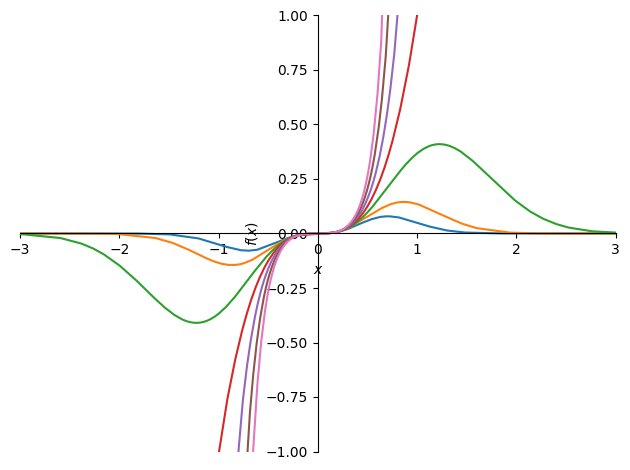

The graphs of g(x) = x**3*exp(b*x**2) for b = [-3, -2, -1, 0, 1, 2, 3] are shown above.


In [124]:
# given g(x) = x^3 * e^(bx^2)
x, b = symbols('x b')
g = x ** 3 * exp(b * x ** 2)

# plot g for b = [-3, -2, -1, 0, 1, 2, 3]
plt = plot(show=False)
for i in range(-3, 4):
    plt.append(plot(g.subs(b, i), show=False)[0])
plt.xlim = (-3, 3)
plt.ylim = (-1, 1)
plt.show()
print(f'The graphs of g(x) = {g} for b = [-3, -2, -1, 0, 1, 2, 3] are shown above.')

#### 2b

In [125]:
# find the critical values of g(x) in terms of b
gprime = g.diff(x)
critical_values = solve(gprime, x)
print(f'The critical values of g(x) are x = {critical_values}')
print(f'Since the x vaules have sqrt(-1/b) in them, the values of b have to be negative for the critical values to be real.')
print(f'So any value of b less than 0 will have real critical values.')


The critical values of g(x) are x = [0, -sqrt(6)*sqrt(-1/b)/2, sqrt(6)*sqrt(-1/b)/2]
Since the x vaules have sqrt(-1/b) in them, the values of b have to be negative for the critical values to be real.
So any value of b less than 0 will have real critical values.


#### 2c

As b approaches -oo, the critical values approach 0.


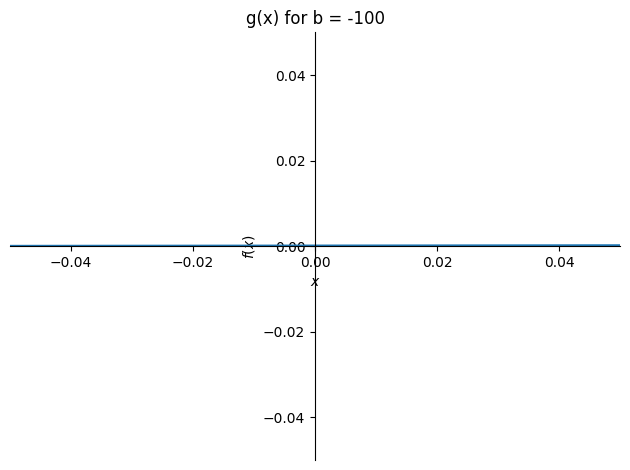

The graph of g(x) = x**3*exp(-100*x**2) for b = -100 is shown above.
As b approaches -oo, the critical values approach 0 and the graph of g(x) approaches a horizontal line at g(x) = 0.


In [126]:
print(f"As b approaches -oo, the critical values approach 0.")
# plot g(x) for b = -100
v = 1e-300
plot(g.subs(b, -100), xlim=(-v, v), ylim=(-v, v), title="g(x) for b = -100")
print(f"The graph of g(x) = {g.subs(b, -100)} for b = -100 is shown above.")
print(f"As b approaches -oo, the critical values approach 0 and the graph of g(x) approaches a horizontal line at g(x) = 0.")

#### 2d

In [127]:
gprimeprime = gprime.diff(x)
print(f"The second derivative of g(x) = {g} which is the derivative of g'(x) is {gprimeprime}")
inflection_points = solve(gprimeprime, x)
print(f'The inflection points of g(x) are x = {inflection_points}')
print(f'Since the x vaules have sqrt(-1/b) in them, the values of b have to be negative for the inflection values to be real.')
print(f'So any value of b less than 0 will have real inflection values.')

The second derivative of g(x) = x**3*exp(b*x**2) which is the derivative of g'(x) is 4*b**2*x**5*exp(b*x**2) + 14*b*x**3*exp(b*x**2) + 6*x*exp(b*x**2)
The inflection points of g(x) are x = [0, -sqrt(2)*sqrt(-1/b)/2, sqrt(2)*sqrt(-1/b)/2, -sqrt(3)*sqrt(-1/b), sqrt(3)*sqrt(-1/b)]
Since the x vaules have sqrt(-1/b) in them, the values of b have to be negative for the inflection values to be real.
So any value of b less than 0 will have real inflection values.


#### 2e

The critical values of g(x) are x = [0, -sqrt(6)*sqrt(-1/b)/2, sqrt(6)*sqrt(-1/b)/2]
The inflection points of g(x) are x = [0, -sqrt(2)*sqrt(-1/b)/2, sqrt(2)*sqrt(-1/b)/2, -sqrt(3)*sqrt(-1/b), sqrt(3)*sqrt(-1/b)]
The values of b where the critical values include -1 and 1 are [-1/2, -3, -3/2]
The values of g(x) where the critical values include -1 and 1 are [x**3*exp(-x**2/2), x**3*exp(-3*x**2), x**3*exp(-3*x**2/2)]


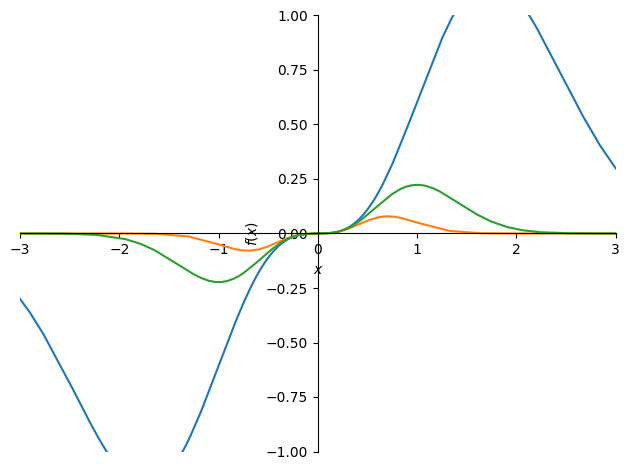

The graphs of g(x) = x**3*exp(b*x**2) for b = [-1/2, -3, -3/2] are shown above.


In [128]:
# find the values of b where the critical values include 1 and -1
critical_values = solve(gprime, x)
print(f'The critical values of g(x) are x = {critical_values}')
inflection_points = solve(gprimeprime, x)
print(f'The inflection points of g(x) are x = {inflection_points}')
eqs = [sqrt(2) * sqrt(-1 / b) / 2 - 1, sqrt(3) * sqrt(-1 / b) - 1, sqrt(6) * sqrt(-1 / b) / 2 - 1]
b_values = [solve(e, b)[0] for e in eqs]
print(f'The values of b where the critical values include -1 and 1 are {b_values}')
eqs = [g.subs(b, b_val) for b_val in b_values]
print(f'The values of g(x) where the critical valueSs include -1 and 1 are {eqs}')
plt = plot(show=False)
for p in eqs:
    plt.append(plot(p, show=False)[0])
plt.xlim = (-3, 3)
plt.ylim = (-1, 1)
plt.show()
print(f'The graphs of g(x) = {g} for b = {b_values} are shown above.')

### Question 3

#### 3a

In [129]:
# use MVT to verify that a value c exists in the interval
# f(x) = ln(5 - x), [1, 4]
f = ln(5 - x)
a, b = 1, 4
secant = (f.subs(x, b) - f.subs(x, a)) / (b - a)
c = solve(secant - f.diff(), x)[0]
print(f'The function f(x) = {f} satisfies MVT since the function is continuous and differentiable on the interval [{a}, {b}].')
print(f'The value of c in the interval [{a}, {b}] is {c}')


The function f(x) = log(5 - x) satisfies MVT since the function is continuous and differentiable on the interval [1, 4].
The value of c in the interval [1, 4] is (-3 + log(1024))/log(4)


#### 3b

In [130]:
# g(x) = (x - 5) ^ (-5), [0, 8]
g = (x - 5) ** -5
print(f"The function g(x) = {g} does not satisfy MVT since the function is not continuous on the interval [0, 8].")

The function g(x) = (x - 5)**(-5) does not satisfy MVT since the function is not continuous on the interval [0, 8].


#### 3c

In [131]:
# h(x) = 8x^2cos(4x), [pi/4, 3pi/4]
h = 8 * x ** 2 * cos(4 * x)
a, b = pi / 4, (3 * pi) / 4
secant = (h.subs(x, b) - h.subs(x, a)) / (b - a)
c = nsolve(secant - h.diff(), x, 1.7)
print(f'The function h(x) = {h} satisfies MVT since the function is continuous and differentiable on the interval [{a}, {b}].')
print(f'The value of c in the interval [{a}, {b}] is {c}')

The function h(x) = 8*x**2*cos(4*x) satisfies MVT since the function is continuous and differentiable on the interval [pi/4, 3*pi/4].
The value of c in the interval [pi/4, 3*pi/4] is 1.70739757583842
